In [23]:
import pandas as pd

# Reload the clean, saved data
df = pd.read_csv('marketing_campaign_final_v2.csv')

Prepare Summary Data

Calculate, for each segment:
- Number of customers
- Response rate (from Response column)
- Average Monetary Value

In [24]:
# Group by segment
segment_stats = df.groupby('Segment').agg({
    'ID': 'count',
    'Response': 'mean',
    'Monetary': 'mean'
}).rename(columns={'ID': 'Num_Customers', 'Response': 'Response_Rate', 'Monetary': 'Avg_Monetary'})

# Calculate expected revenue per segment if a campaign is sent to all
segment_stats['Expected_Revenue'] = (
    segment_stats['Num_Customers'] *
    segment_stats['Response_Rate'] *
    segment_stats['Avg_Monetary']
)

segment_stats = segment_stats.sort_values(by='Expected_Revenue', ascending=False)
segment_stats

,Num_Customers,Response_Rate,Avg_Monetary,Expected_Revenue
Segment,,,,
Champions,334,0.332335,1332.607784,147919.464072
Loyal Customers,471,0.203822,1071.407643,102855.133758
Potential Loyalists,463,0.140389,616.775378,40090.399568
At Risk,161,0.055901,420.776398,3786.987578
Promising,199,0.125628,97.010050,2425.251256
Hibernating,534,0.039326,57.084270,1198.769663
New Customers,75,0.093333,29.653333,207.573333


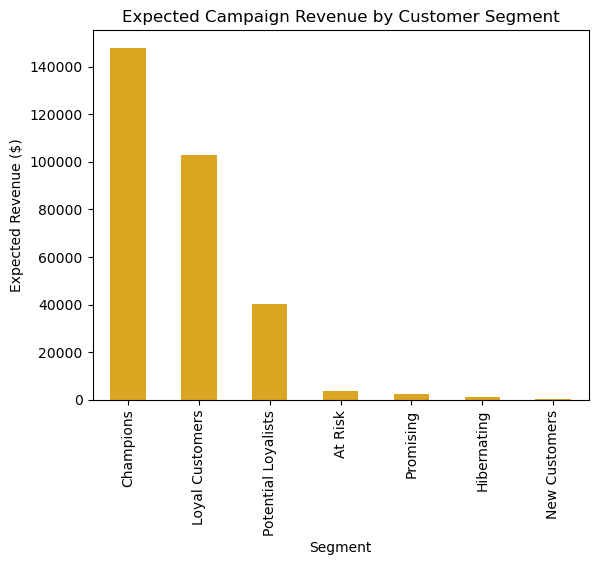

In [34]:
#Visualise ROI/Expected Revenue by Segment

import matplotlib.pyplot as plt

segment_stats['Expected_Revenue'].plot(kind='bar', color='goldenrod')
plt.title('Expected Campaign Revenue by Customer Segment')
plt.ylabel('Expected Revenue ($)')
plt.xlabel('Segment')
plt.savefig('expected_revenue_by_segment.png')
plt.show()

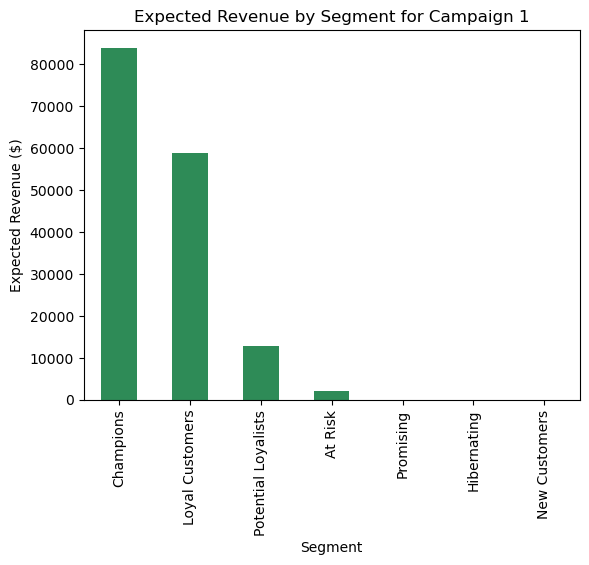

In [26]:
#ROI by Specific Campaign

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    df[f'{cmp}_Rate'] = df.groupby('Segment')[cmp].transform('mean')

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    segment_stats[f'{cmp}_Revenue'] = (
        segment_stats['Num_Customers'] *
        df.groupby('Segment')[cmp].mean() *
        segment_stats['Avg_Monetary']
    )

# Campaign 1 ROI by segment
segment_stats['AcceptedCmp1_Revenue'].plot(kind='bar', color='seagreen')
plt.title('Expected Revenue by Segment for Campaign 1')
plt.ylabel('Expected Revenue ($)')
plt.xlabel('Segment')
plt.show()

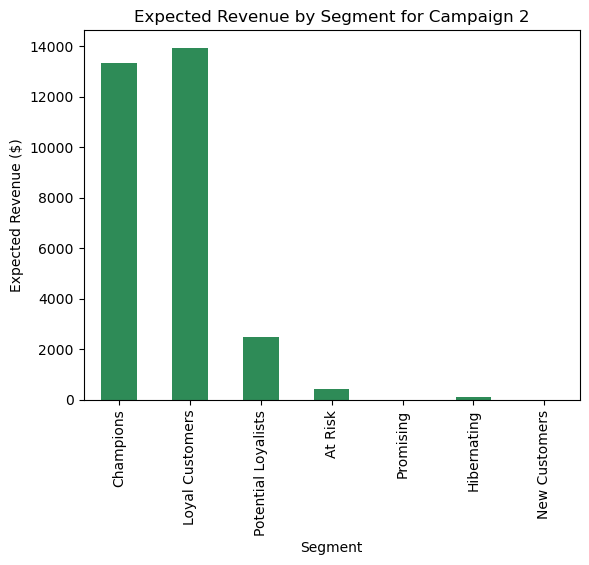

In [27]:
#ROI by Specific Campaign

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    df[f'{cmp}_Rate'] = df.groupby('Segment')[cmp].transform('mean')

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    segment_stats[f'{cmp}_Revenue'] = (
        segment_stats['Num_Customers'] *
        df.groupby('Segment')[cmp].mean() *
        segment_stats['Avg_Monetary']
    )

# Campaign 2 ROI by segment
segment_stats['AcceptedCmp2_Revenue'].plot(kind='bar', color='seagreen')
plt.title('Expected Revenue by Segment for Campaign 2')
plt.ylabel('Expected Revenue ($)')
plt.xlabel('Segment')
plt.show()

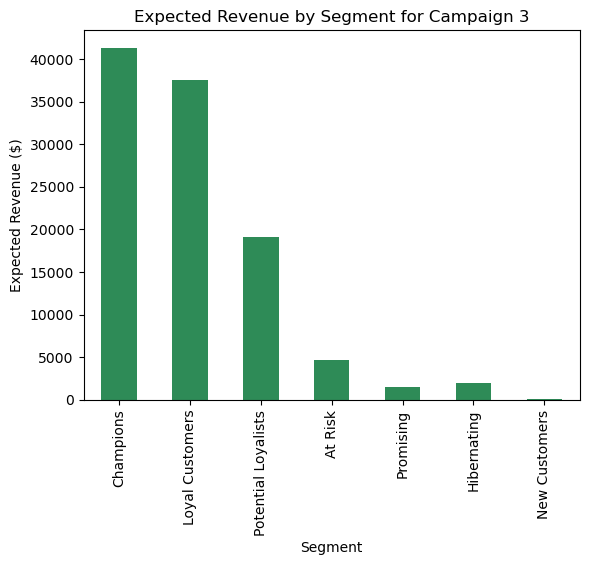

In [28]:
#ROI by Specific Campaign

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    df[f'{cmp}_Rate'] = df.groupby('Segment')[cmp].transform('mean')

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    segment_stats[f'{cmp}_Revenue'] = (
        segment_stats['Num_Customers'] *
        df.groupby('Segment')[cmp].mean() *
        segment_stats['Avg_Monetary']
    )

# Campaign 3 ROI by segment
segment_stats['AcceptedCmp3_Revenue'].plot(kind='bar', color='seagreen')
plt.title('Expected Revenue by Segment for Campaign 3')
plt.ylabel('Expected Revenue ($)')
plt.xlabel('Segment')
plt.show()

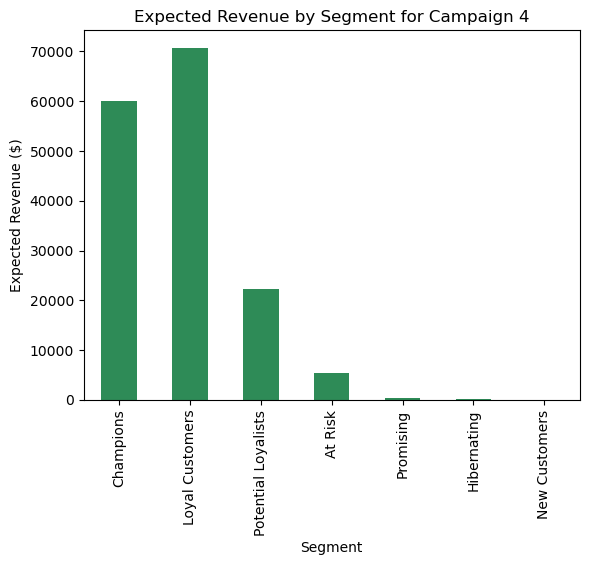

In [29]:
#ROI by Specific Campaign

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    df[f'{cmp}_Rate'] = df.groupby('Segment')[cmp].transform('mean')

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    segment_stats[f'{cmp}_Revenue'] = (
        segment_stats['Num_Customers'] *
        df.groupby('Segment')[cmp].mean() *
        segment_stats['Avg_Monetary']
    )

# Campaign 4 ROI by segment
segment_stats['AcceptedCmp4_Revenue'].plot(kind='bar', color='seagreen')
plt.title('Expected Revenue by Segment for Campaign 4')
plt.ylabel('Expected Revenue ($)')
plt.xlabel('Segment')
plt.show()

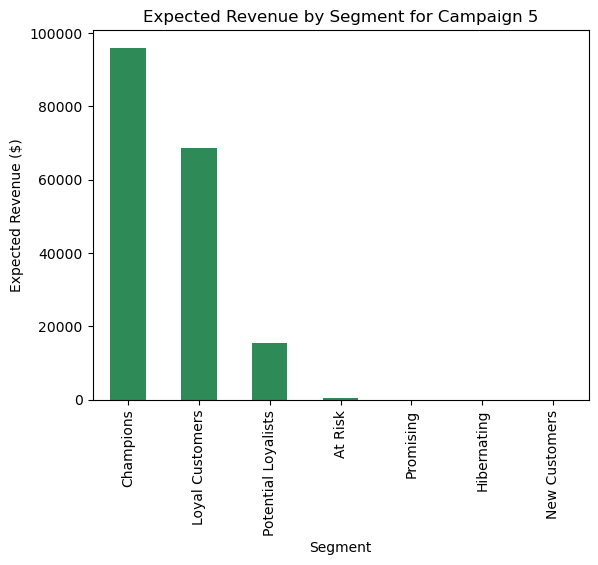

In [30]:
#ROI by Specific Campaign

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    df[f'{cmp}_Rate'] = df.groupby('Segment')[cmp].transform('mean')

for cmp in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    segment_stats[f'{cmp}_Revenue'] = (
        segment_stats['Num_Customers'] *
        df.groupby('Segment')[cmp].mean() *
        segment_stats['Avg_Monetary']
    )

# Campaign 5 ROI by segment
segment_stats['AcceptedCmp5_Revenue'].plot(kind='bar', color='seagreen')
plt.title('Expected Revenue by Segment for Campaign 5')
plt.ylabel('Expected Revenue ($)')
plt.xlabel('Segment')
plt.show()

In [35]:
print(campaign_summary[[col for col in campaign_summary.columns if 'ExpRevenue' in col]].round(2).to_markdown())


|                     |   AcceptedCmp1_ExpRevenue |   AcceptedCmp2_ExpRevenue |   AcceptedCmp3_ExpRevenue |   AcceptedCmp4_ExpRevenue |   AcceptedCmp5_ExpRevenue |
|:--------------------|--------------------------:|--------------------------:|--------------------------:|--------------------------:|--------------------------:|
| Champions           |                  83954.3  |                  13326.1  |                  41310.8  |                  59967.3  |                  95947.8  |
| Loyal Customers     |                  58927.4  |                  13928.3  |                  37499.3  |                  70712.9  |                  68570.1  |
| Potential Loyalists |                  12952.3  |                   2467.1  |                  19120    |                  22203.9  |                  15419.4  |
| At Risk             |                   2103.88 |                    420.78 |                   4628.54 |                   5470.09 |                    420.78 |
| Promising     

In [31]:
# List your campaign columns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Initialize a summary DataFrame
campaign_summary = pd.DataFrame(index=df['Segment'].unique())

for cmp in campaign_cols:
    # Calculate response rate per segment for this campaign
    response_rate = df.groupby('Segment')[cmp].mean()
    # Calculate expected revenue per segment for this campaign
    avg_monetary = df.groupby('Segment')['Monetary'].mean()
    num_customers = df.groupby('Segment')['ID'].count()
    expected_revenue = num_customers * response_rate * avg_monetary
    
    # Store results in summary table
    campaign_summary[cmp + '_RespRate'] = response_rate
    campaign_summary[cmp + '_ExpRevenue'] = expected_revenue

# Reorder index if desired (optional)
segment_order = ['Champions', 'Loyal Customers', 'Potential Loyalists', 'At Risk', 'Promising', 'Hibernating', 'New Customers']
campaign_summary = campaign_summary.reindex(segment_order)

# Optionally, round for readability
campaign_summary = campaign_summary.round(2)

# Display the full summary table
campaign_summary


,AcceptedCmp1_RespRate,AcceptedCmp1_ExpRevenue,AcceptedCmp2_RespRate,AcceptedCmp2_ExpRevenue,AcceptedCmp3_RespRate,AcceptedCmp3_ExpRevenue,AcceptedCmp4_RespRate,AcceptedCmp4_ExpRevenue,AcceptedCmp5_RespRate,AcceptedCmp5_ExpRevenue
Champions,0.19,83954.29,0.03,13326.08,0.09,41310.84,0.13,59967.35,0.22,95947.76
Loyal Customers,0.12,58927.42,0.03,13928.30,0.07,37499.27,0.14,70712.90,0.14,68570.09
Potential Loyalists,0.05,12952.28,0.01,2467.10,0.07,19120.04,0.08,22203.91,0.05,15419.38
At Risk,0.03,2103.88,0.01,420.78,0.07,4628.54,0.08,5470.09,0.01,420.78
Promising,0.00,0.00,0.00,0.00,0.08,1455.15,0.02,291.03,0.00,0.00
Hibernating,0.00,0.00,0.00,114.17,0.07,1997.95,0.01,228.34,0.00,0.00
New Customers,0.00,0.00,0.00,0.00,0.07,148.27,0.00,0.00,0.00,0.00


In [32]:
df.to_csv('marketing_campaign_model_data.csv', index=False)
